<h1>Question 5: Minimizing a quadratic polynomial with D-Wave Leap</h1>
<h3>Part A</h3>


In [1]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import matplotlib.pyplot as plt 

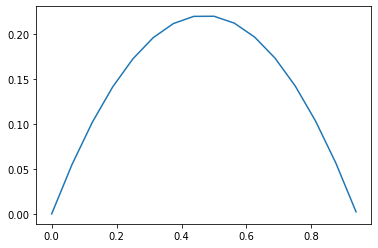

In [2]:
x = [(i/16) for i in range(16)]
y = [(-(i*i) + 0.94*i) for i in x]

plt.plot(x, y)

p(x) appears to have minimum values at `x = 0` and `x = 15/16`, so we can check to see which is actually the minimum.

In [4]:
if y[0] < y[15]:
    print("The global minimum value is", y[0], "when x = 0/16, which is when j1j2j3j4 = 0000.")
    print("There is a local minima of", y[15], "when x = 15/16, which is when j1j2j3j4 = 1111.")
else:
    print("The global minimum value is", y[15], "when x = 15/16, which is when j1j2j3j4 = 1111.")
    print("There is a local minima of", y[0], "when x = 0/16, which is when j1j2j3j4 = 0000.")

The global minimum value is 0.0 when x = 0/16, which is when j1j2j3j4 = 0000.
There is a local minima of 0.002343749999999978 when x = 15/16, which is when j1j2j3j4 = 1111.


<h3>Part B</h3>

Expand and build the polynomial model:

`p(x) = -x^2 + (0.94)x`

`p(x) = -(j1 / 2 + j2 / 4 + j3 / 8 + j4 / 16)^2 + 0.94(j1 / 2 + j2 / 4 + j3 / 8 + j4 / 16)`

`p(x) = -(j1^2 / 4 + j1*j2 / 4 + j1*j3 / 8 + j1*j4 / 16 + j2^2 / 16 + j2*j3 / 16 + j2*j4 / 32 + j3^2 / 64 + j3*j4 / 64 + j4^2 / 256) + 0.94(j1 / 2 + j2 / 4 + j3 / 8 + j4 / 16)`

`p(x) = 0.22j1 + 0.1725j2 + 0.101875j3 + 0.05484j4 - (j1*j2 / 4 + j1*j3 / 8 + j1*j4 / 16 + j2*j3 / 16 + j2*j4 / 32 + j3*j4 / 64)`

In [5]:
# Build the QUBO
linear = {('j1', 'j1'): 0.22, ('j2', 'j2'): 0.1725, ('j3', 'j3'): 0.101875, ('j4', 'j4'): 0.05484}
quadratic = {('j1', 'j2'): -0.25, ('j1', 'j3'): -0.125, ('j1', 'j4'): -0.0625, ('j2', 'j3'): -0.0625, ('j2', 'j4'): -0.03125, ('j3', 'j4'): -0.015625}
Q = dict(linear)
Q.update(quadratic)

In [6]:
# Run in the QPU
response = EmbeddingComposite(DWaveSampler()).sample_qubo(Q, num_reads=1000)
for (sample, energy, num_occurrences, aux) in response.data():
    print(sample, "Energy: ", energy, "Occurrences: ", num_occurrences)

{'j1': 0, 'j2': 0, 'j3': 0, 'j4': 0} Energy:  0.0 Occurrences:  163
{'j1': 1, 'j2': 1, 'j3': 1, 'j4': 1} Energy:  0.0023400000000000087 Occurrences:  193
{'j1': 0, 'j2': 0, 'j3': 0, 'j4': 1} Energy:  0.05484 Occurrences:  141
{'j1': 1, 'j2': 1, 'j3': 1, 'j4': 0} Energy:  0.05687500000000001 Occurrences:  118
{'j1': 0, 'j2': 0, 'j3': 1, 'j4': 0} Energy:  0.101875 Occurrences:  59
{'j1': 1, 'j2': 1, 'j3': 0, 'j4': 1} Energy:  0.10358999999999996 Occurrences:  51
{'j1': 0, 'j2': 0, 'j3': 1, 'j4': 1} Energy:  0.14109 Occurrences:  68
{'j1': 1, 'j2': 1, 'j3': 0, 'j4': 0} Energy:  0.14249999999999996 Occurrences:  1
{'j1': 1, 'j2': 1, 'j3': 0, 'j4': 0} Energy:  0.14249999999999996 Occurrences:  32
{'j1': 0, 'j2': 1, 'j3': 0, 'j4': 0} Energy:  0.1725 Occurrences:  22
{'j1': 1, 'j2': 0, 'j3': 1, 'j4': 1} Energy:  0.17359000000000002 Occurrences:  25
{'j1': 0, 'j2': 1, 'j3': 0, 'j4': 1} Energy:  0.19609 Occurrences:  29
{'j1': 1, 'j2': 0, 'j3': 1, 'j4': 0} Energy:  0.19687500000000002 Occurrenc

Based on the above data we see that the QPU found the global minima 163/1000 times. 193/1000 times it got stuck in the local minima. The fraction of times the QPU found neither the global nor local minima was 644/1000.